# 전처리 종합실습 평가

#### 목표
1. 간략히 가설수립을 합니다.
2. 데이터를 탐색합니다.(역시 간략히)
3. 가설로 도출된 요인들을 추가변수로 생성합니다.
4. 모델링을 위한 전처리를 수행합니다.
5. 준비된 모델링 코드로 성능을 확인합니다.

#### 규칙
1. 개념에 대한 질문, 문제의 이해를 위한 질문에 대해 답변을 드립니다.
2. 오류에 대해서는 해결 방안과 힌트를 제공해 드립니다.
3. 참조 가능한 자료는 동료들의 소스코드를 제외한 모든 자료를 참조할 수 있습니다. 

# 1단계: 비즈니스이해~ Labeling까지



## 1. 비즈니스 이해

문제 정의 : 
* 우리는 고객이 이탈할 것인지 사전에 예측하는 모델을 만들고자 합니다.
* 이탈할 고객을 미리 예측할 수 있다면, 프로모션을 통해 이탈을 예방할 수 있습니다.
* 그렇다면 고객의 이탈에 영향을 주는 요인은 무엇일까요?


다음과 같이 구체적으로 문제를 정의하고자 한다.
* 2016년12월말 기준으로
* 이후 3개월 방문(구매) 안한 사람을 이탈로 보자.
* 관심있는 고객은 
    - 2015~2016년 신규 가입 고객 이면서,
    - 2016년 하반기에 한번 이상 방문한 고객


### 문제1 :  
아래 셀에 이탈여부와 관련한 요인을 최소한 5가지 이상을 도출해 봅시다.  
이 질문에 대한 답은 3.데이터준비단계를 수행하면서 다시 여기로 돌아와서 수정하거나 추가해야 할 수도 있습니다.


예시1) 2016년에 4번이상 방문하고 10000만원 이상구매한 고객은 이탈하지 않을 것이다.  
예시2) 남성고객이면서, 30대 고객은 고객은 이탈할 것이다.   
    
    
    1) 반찬과 같이 유통기한이 짧고 즉시 사용되는 카테고리의 경우 연중 고르게 판매가 이루어질 것이다
    2) 구매 횟수 / 가입일로부터 시간이 큰 고객일수록 이탈할 가능성이 낮은 충성 고객일 것이다.  
    3) 가격이 큰 일회성 상품을 구매한 고객은 이탈할 가능성이 높을 것이다.
    4) 싼 가격의 할인 물품을 산 고객들은 일회성으로 방문할 고객일 수 있으므로 이탈할 가능성이 높다.
    5) 환불을 한 고객의 경우 이탈의 가능성이 높다(환불 : amt가 -인 경우로 추정)
    6) 40대 이상의 여성 고객의 경우 이탈 가능성이 낮을 것이다. 
    7) 월별 구매액이 꾸준한 고객일수록 이탈 가능성이 낮다.
    8) 특정 도서 지역(강원도 등)은 구매의 선택지가 낮아 이탈 가능성이 낮다.
    9) 10대 고객의 경우 단발성 구매가 많아 이탈 가능성이 높다. 
    10) 2016년 30만원 이상 구매했으며, 4달 이상 구매한 기록이 있는 고객은 이탈하지 않을것이다.
    


## 2.데이터 이해

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from plotnine import *

In [3]:
customers = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/customers.csv'
                 , sep=',', skipinitialspace=True, encoding='CP949')  
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,강원 원주시 늘품로,F,1960,강원도,원주시
1,c281448,2013-06-18,강원 원주시 치악로,F,1974,강원도,원주시
2,c038336,2003-10-10,강원 춘천시 서부대성로,F,1968,강원도,춘천시
3,c084237,2007-03-09,강원도 강릉시 연곡면 황어대길,F,1982,강원도,강릉시
4,c162600,2010-06-14,강원도 속초시 농공단지길,F,1978,강원도,속초시


In [4]:
products = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/products.csv'
                 , sep=',', skipinitialspace=True, encoding='CP949')  
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1052661,새우깡,간식,과자,3
1,p1054261,고구마스틱,간식,과자,3
2,p1097821,짱구,간식,과자,3
3,p1097831,감자칩,간식,과자,3
4,p1119071,뿌셔뿌셔,간식,과자,3


In [5]:
sales = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/sales.csv'
                 , sep=',', skipinitialspace=True, encoding='CP949')  
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [6]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate']) 
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate']) 

In [7]:
print(customers.shape)
print(products.shape)
print(sales.shape)

(2243, 7)
(62, 5)
(70012, 7)


**데이터 탐색은 3.데이터 준비 단계 후에 진행해 봅시다.**

###  문제 2. 데이터 살펴보기

2-1) 2016년 월별 매출액은?

In [8]:
sales['year'] = pd.to_datetime(sales['OrderDate']).dt.year
sales['month'] = pd.to_datetime(sales['OrderDate']).dt.month
sales['day'] = pd.to_datetime(sales['OrderDate']).dt.day

In [9]:
sales_2016 = sales.loc[sales.year == 2016]
monthly_Amt_2016 = sales_2016.groupby('month').Amt.sum().reset_index()
monthly_Amt_2016.columns = ['month', 'Amt']
monthly_Amt_2016

,month,Amt
0,1,14209990
1,2,14367451
2,3,17111120
3,4,15129917
4,5,13976941
5,6,13113610
6,7,10717743
7,8,10176702
8,9,10496653
9,10,10003648


2-2) 총 가입고객수는?

In [10]:
customers['CustomerID'].nunique()

2243

2-3) 2015~2016에 가입한 고객은 총 몇명인가?

In [11]:
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'] )

In [12]:
regit_201516 = customers.loc[(customers['RegisterDate'].dt.year==2015) | (customers['RegisterDate'].dt.year==2016) ]

In [13]:
regit_201516.CustomerID.nunique()

485

2-4) 2016년 하반기에 구매한 적이 있는 고객의 수는?

In [14]:
ex = sales.loc[(sales['year']==2016) | (sales['month']>=7) ]
ex.CustomerID.nunique()

2112

In [15]:
sales = sales.merge(products, on = 'ProductID', how = 'left')

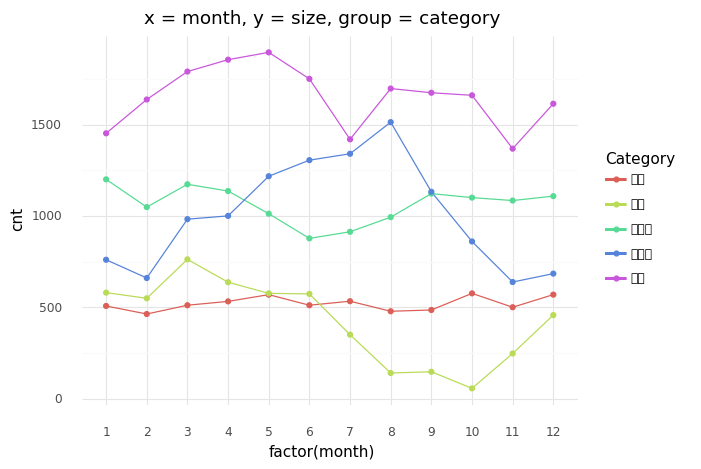

<ggplot: (7544909439)>


In [16]:
# 가설 1. 반찬과 같이 유통기한이 짧고 즉시 사용되는 카테고리의 경우 연중 고르게 판매가 이루어질 것이다.

# 접근 방법
###########################
# 1) 2016년 월별, 카테고리의 판매 갯수를 추출
# 2) 1) 내용을 월별 line chart로 구현
###########################

sales2016 = sales.loc[sales['year']==2016]
ex = sales2016.groupby(['month','Category']).size().reset_index()
ex.columns = ['month', 'Category', 'cnt']
p = (ggplot(ex, aes('factor(month)', 'cnt', group = 'Category', fill ='Category', color ='Category' )) + 
     geom_line() + geom_point() + theme_minimal() + ggtitle('x = month, y = size, group = category'))
print(p)

- 반찬(초록색 라인)의 경우 연중 일정하게 구매가 이루어지는 편이며, 간식(빨간색 라인)또한 월별로 판매가 꾸준히 이루어짐
- 유제품(파란색 라인)이 여름 이후 급속도로 구매가 급감했으며, 이는 아이스크림 등의 계절성 판매가 반영된것으로 추정
- (한글이 깨져서... 가독성이 떨어지는점 죄송합니다)

In [17]:
# 가설 2. (구매 횟수 / 가입일로부터 시간)이 큰 고객일수록 이탈할 가능성이 낮은 충성 고객일 것이다.(향후에도 구매가 많을 것이다)  

# 접근 방법
######################################################################
# 1) 2016년 상반기 구매 데이터만 추출하고, 고객별로 구매 횟수를 구함
# 2) 2016년 6월 30일 기준으로 가입 시점 대비 며칠이 경과하였는지를 구하는 컬럼 제작
# 3) 1)에서 2)을 나눈 값을 cnt_per_days로 저장 (이 값이 클수록 잦은 빈도로 구매했을 가능성이 있음)
#    ==> 고객이 1회에 다수의 제품을 구입한 경우도 있을 수 있지만, 일단 현 가설에서는 해당 경우는 제외
# 4) 위 1)~3)을 수행하게 된 대상 customerID를 바탕으로 2016년 하반기 구매 횟수를 구함
# 3)과 4)의 scatter plot을 제작하여 상관관계를 파악
######################################################################

In [18]:
sales2016_half = sales.loc[(sales['year']==2016) & (sales['month']<=6) ]
ex = sales2016_half.groupby('CustomerID').size().reset_index()
ex.columns = ['CustomerID', 'cnt_2016_half']

In [19]:
from datetime import datetime
then = datetime(2016, 6, 30)

In [20]:
ex2 = customers.merge(ex, on = 'CustomerID', how = 'right')
ex2['time_diff'] = ((then - ex2['RegisterDate']) / pd.Timedelta(1, unit='d'))

In [21]:
ex2['cnt_per_days'] = ex2['cnt_2016_half'] / ex2['time_diff']

In [22]:
cusid = ex2['CustomerID'].unique()
sales2016_last = sales.loc[((sales['year']==2016) & (sales['month']<=6)) & (sales['CustomerID'].isin(cusid)) ]

In [23]:
ex3 = sales2016_last.groupby('CustomerID').size().reset_index()
ex3.columns = ['CustomerID', 'cnt_2016_last']

In [24]:
ex2 = ex2.merge(ex3, on = 'CustomerID', how = 'left')

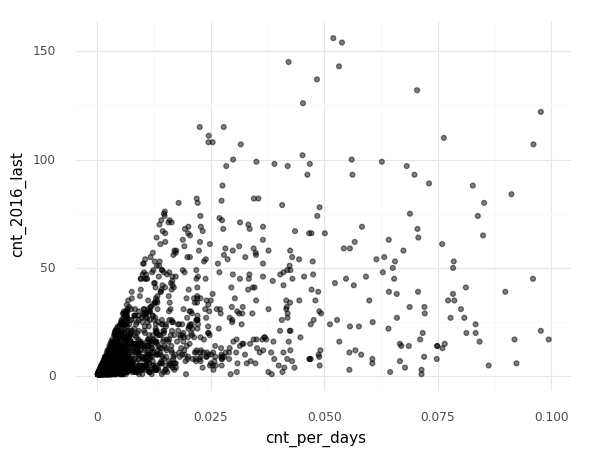

<ggplot: (-9223372029309439274)>
0.5730228680170394


In [25]:
temp = ex2.loc[ex2['cnt_per_days']<0.1] # 일부 아웃라이어들로 인해 그래프 가독성이 떨어지는 관계로 0.1 미만 데이터만 subset
p = ggplot(temp, aes('cnt_per_days', 'cnt_2016_last')) + geom_point(alpha = 0.5) + theme_minimal()
print(p)
print(np.corrcoef(temp['cnt_per_days'], temp['cnt_2016_last'])[0][1])

- 2016년 상반기 cnt_per_days(구매 횟수를 가입후 경과기간으로 나눈 값)이 커질수록 2016년 하반기 구매 횟수가 커지는 경향을 보임

## 3. 데이터 준비(Preprocessing)

### 문제 3. Labeling

우리는 고객이 이탈할 것인지 사전에 예측하는 모델을 만들고자 한다.  
그렇다면 고객의 이탈을 어떻게 정의할 것인가?  

* 2016년12월말 기준
* 이후 3개월 방문 안한 사람을 이탈로 보자.
* 관심있는 고객은 
    - 2015~2016년 신규 가입 고객 이면서,
    - 2016년 하반기에 한번 이상 방문한 고객


3-1) 고객ID 조회 : 
    - 2016년 하반기에 한번 이상 방문한 고객 중 2015~2016년 신규 가입 고객을 조회하시오.
    
    * .between(     )
    * .drop_duplications()

In [26]:
# 2016년 하반기에 한 번 이상 방문한 고객들의 unique id
ex = sales.loc[(sales['year']==2016) & (sales['month']>=7) ]
user_id1 = ex.CustomerID.unique()

# 2015~2016년 신규 가입 고객 
regit_201516 = customers.loc[(customers['RegisterDate'].dt.year==2015) | (customers['RegisterDate'].dt.year==2016) ]
user_id2 = regit_201516.CustomerID.unique()

target_user = list(set(user_id1) & set(user_id2))
print(len(user_id1))
print(len(user_id2))

1711
485


In [27]:
len(target_user) # 총 463명의 유저가 우리가 보고자 하는 고객

354

In [28]:
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,year,month,day,ProductName,Category,SubCategory,CategoryOrd
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,2,순두부,반찬류,두부,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1,2,포토아이스크림,유제품,아이스크림,4
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1,2,느타리버섯,채소,버섯,5
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1,2,두부_소,반찬류,두부,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1,2,감자칩,채소,뿌리채소,5


3-2) 3-1)의 결과에 해당하는 고객ID 별로 2017년 1~3월 방문 여부(이탈여부) 데이터프레임 만들기
    - 고객ID
    - 이탈여부 : (주의)변수 이름을 반드시 Churn 으로 만들어 주세요. 1이 이탈, 0은 잔류 입니다.


In [29]:
ex = sales.loc[(sales['year']==2017) & (sales['month']<=3) ]
user_id_2017 = ex.CustomerID.unique() # 2017년 구매를 한 고객들의 unique 데이터

In [30]:
len(user_id_2017)

1388

In [31]:
target_0_user = list(set(target_user) & set(user_id_2017)) # 2017년 구매를 한 데이터들이므로 잔존유저
target_1_user = list(set(target_user) - set(target_0_user)) #  나머지 데이터는 이탈 유저

In [32]:
print(len(target_0_user))
print(len(target_1_user))

226
128


In [33]:
target0 = pd.DataFrame(target_0_user, columns = ['CustomerID'] ).reset_index(drop = True)
target0['Churn'] = 0
target1 = pd.DataFrame(target_1_user, columns = ['CustomerID'] ).reset_index(drop = True)
target1['Churn'] = 1

target_id = pd.concat([target0, target1]).reset_index(drop = True)

In [34]:
target_id # 최종 대상 고객들을 담은 dataframe

,CustomerID,Churn
0,c348709,0
1,c354434,0
2,c383761,0
3,c352409,0
4,c385259,0
...,...,...
349,c372227,1
350,c370258,1
351,c360613,1
352,c394007,1


In [35]:
# target 데이터만 존재하는 customer, sales 데이터 추출
# customers_2 = customers.merge(target_id, on = 'CustomerID')
# sales_2 = sales.merge(target_id, on = 'CustomerID')

In [36]:
#customers_2.head()

# 여기까지 수행 후 1차 제출합니다.
여기까지 수행한 후 파일이름 뒤에 **_자신의이름**  을 붙여서 제출합니다.  _

같이 풀이후, 정답을 제공받아서 다음을 진행합니다.


In [37]:
customer_churn = target_id

# 2단계 : 변수 추가 ~ 모델링까지!

### 문제 4. 변수 추가하기

문제 1에서 도출된 요인들을 변수로 만들기  
**3-2) 문제 결과에 변수들을 추가합니다.**

아래 문제들을 풀고, 여러분의 변수들을 추가해 봅시다.

현재를 2016년12월31일로 간주합니다.

4-1) 성별, 나이 추가하기  

In [38]:
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,강원 원주시 늘품로,F,1960,강원도,원주시
1,c281448,2013-06-18,강원 원주시 치악로,F,1974,강원도,원주시
2,c038336,2003-10-10,강원 춘천시 서부대성로,F,1968,강원도,춘천시
3,c084237,2007-03-09,강원도 강릉시 연곡면 황어대길,F,1982,강원도,강릉시
4,c162600,2010-06-14,강원도 속초시 농공단지길,F,1978,강원도,속초시


In [39]:
customer_churn.head()

,CustomerID,Churn
0,c348709,0
1,c354434,0
2,c383761,0
3,c352409,0
4,c385259,0


In [40]:
customer_churn = customer_churn.merge(customers[['CustomerID','Gender', 'BirthYear']], on = 'CustomerID', how = 'left')
customer_churn['age'] = 2020 - customer_churn['BirthYear']
customer_churn.drop('BirthYear', axis = 1, inplace = True)

In [41]:
customer_churn.head()

,CustomerID,Churn,Gender,age
0,c348709,0,F,41
1,c354434,0,F,58
2,c383761,0,F,41
3,c352409,0,F,35
4,c385259,0,F,26


4-2) 최근 3개월 구매액, 방문횟수

In [42]:
sales['month_day'] = sales['month'].astype('str')+ "_"+ sales['day'].astype('str')

In [43]:
temp = sales.loc[(sales['year']==2016) & (sales['month']>=10)]
temp = temp.groupby('CustomerID').agg({'Amt':['sum'], 'month_day':['nunique']}).reset_index()
temp.columns = ['CustomerID', 'lag_3month_amount', 'lag_3month_visit_cnt']
temp.head()
customer_churn = customer_churn.merge(temp, on = 'CustomerID', how= 'left')

In [44]:
customer_churn['lag_3month_amount'].fillna(customer_churn['lag_3month_amount'].mean(), inplace = True)
customer_churn['lag_3month_visit_cnt'].fillna(customer_churn['lag_3month_visit_cnt'].mean(), inplace = True)

In [45]:
customer_churn.head()

,CustomerID,Churn,Gender,age,lag_3month_amount,lag_3month_visit_cnt
0,c348709,0,F,41,49458.000000,6.000000
1,c354434,0,F,58,19074.765799,3.446097
2,c383761,0,F,41,22644.000000,3.000000
3,c352409,0,F,35,2000.000000,1.000000
4,c385259,0,F,26,55127.000000,12.000000


4-3) 최근 3개월 카테고리(category)별 구매액

In [46]:
temp = sales.loc[(sales['year']==2016) & (sales['month']>=10)]
temp = temp.groupby(['CustomerID', 'Category']).Amt.sum().reset_index()
temp.columns = ['CustomerID', 'Category', 'Amt_by_category']
temp = temp.pivot(index='CustomerID', columns='Category', values = 'Amt_by_category')
temp.reset_index(inplace = True)
temp.columns = ['CustomerID', 'category1', 'category2', 'category3', 'category4', 'category5' ]
temp.fillna(0, inplace = True)
temp

,CustomerID,category1,category2,category3,category4,category5
0,c017487,9546.0,0.0,8950.0,11960.0,13750.0
1,c017503,0.0,17600.0,0.0,2750.0,4050.0
2,c017517,12317.0,8000.0,6500.0,15704.0,15450.0
3,c017522,0.0,0.0,13477.0,0.0,8550.0
4,c017526,0.0,0.0,5800.0,0.0,3950.0
...,...,...,...,...,...,...
1377,c395401,864.0,0.0,0.0,8250.0,0.0
1378,c395638,1455.0,8370.0,5077.0,4600.0,5300.0
1379,c395673,0.0,4200.0,0.0,0.0,0.0
1380,c396022,1455.0,0.0,0.0,4150.0,2350.0


In [47]:
customer_churn = customer_churn.merge(temp, on = 'CustomerID', how= 'left')

In [48]:
customer_churn.fillna(0, inplace = True)

In [49]:
customer_churn.head()

,CustomerID,Churn,Gender,age,lag_3month_amount,lag_3month_visit_cnt,category1,category2,category3,category4,category5
0,c348709,0,F,41,49458.000000,6.000000,7228.0,8370.0,18300.0,0.0,15560.0
1,c354434,0,F,58,19074.765799,3.446097,0.0,0.0,0.0,0.0,0.0
2,c383761,0,F,41,22644.000000,3.000000,6817.0,8400.0,3227.0,0.0,4200.0
3,c352409,0,F,35,2000.000000,1.000000,0.0,0.0,0.0,0.0,2000.0
4,c385259,0,F,26,55127.000000,12.000000,2000.0,0.0,19277.0,9200.0,24650.0


- 모델 돌릴때 한글 변수를 사용 시 오류가 날것을 대비하여 category1~5로 변환합니다.

4-4) 가입 개월수  
일수 : 날짜1 - 날짜2  
개월수 : 일수 / np.timedelta64(1,'M'))

In [50]:
from datetime import datetime
then = datetime(2016, 12, 31)

In [51]:
customers['days_to_register'] = ((then - customers['RegisterDate']) / pd.Timedelta(1, unit='d'))

In [52]:
customer_churn = customer_churn.merge(customers[['CustomerID','days_to_register' ]], on = 'CustomerID', how= 'left')

- 30으로 나누어서 개월수로 만들수 있으나, 모델에 days형식이 나을것 같아서 개월로 나누는 과정은 생략하고 진행하겠습니다.

In [53]:
customer_churn.head()

,CustomerID,Churn,Gender,age,lag_3month_amount,lag_3month_visit_cnt,category1,category2,category3,category4,category5,days_to_register
0,c348709,0,F,41,49458.000000,6.000000,7228.0,8370.0,18300.0,0.0,15560.0,597.0
1,c354434,0,F,58,19074.765799,3.446097,0.0,0.0,0.0,0.0,0.0,533.0
2,c383761,0,F,41,22644.000000,3.000000,6817.0,8400.0,3227.0,0.0,4200.0,172.0
3,c352409,0,F,35,2000.000000,1.000000,0.0,0.0,0.0,0.0,2000.0,557.0
4,c385259,0,F,26,55127.000000,12.000000,2000.0,0.0,19277.0,9200.0,24650.0,152.0


4-5) 그외 여러분이 도출한 가설에 포함된 요인을 추가 변수로 5개 이상 만드시오.

In [54]:
# feature 1. 3개월 사용 금액 / 등록일
customer_churn['3month_amt_divide_reg'] = customer_churn['lag_3month_amount'] / (customer_churn['days_to_register'] + 1)

In [55]:
# feature 2. 3개월 방문횟수 / 등록일
customer_churn['lag_3month_visit_cnt_divide_reg'] = customer_churn['lag_3month_visit_cnt'] / (customer_churn['days_to_register'] + 1)

In [56]:
# feature 3. 3개월동안 구매한 세부 상품의 nunque (산 상품이 다양할수록 이탈할 가능성이 낮지않을까?)
temp = sales.loc[(sales['year']==2016) & (sales['month']>=10)]
temp = temp.groupby('CustomerID').ProductName.nunique().reset_index()
temp.columns = ['CustomerID', 'pro_nuniqe_cnt']
temp.fillna(0, inplace = True)
customer_churn = customer_churn.merge(temp, on = 'CustomerID', how = 'left')
customer_churn.fillna(0, inplace = True)

In [57]:
# feature 4,5 최근 1개월 사용 금액, 방문 횟수(12월) -  최근 2개월 사용금액, 방문횟수(11월)  
# (전전달 대비 상품 구매가 늘었으면 이탈 가능성도 작지않을까?)

- feature4, 5는 추가하였으나 스코어가 하락하여 최종 모델에서 제외했습니다.
- (하단 score 기록 참고)

In [58]:
'''
temp = sales.loc[(sales['year']==2016) & (sales['month']>=12)]
temp = temp.groupby('CustomerID').agg({'Amt':['sum'], 'month_day':['nunique']}).reset_index()
temp.columns = ['CustomerID', 'lag_3month_amount_12', 'lag_3month_visit_cnt_12']
temp.head()
customer_churn = customer_churn.merge(temp, on = 'CustomerID', how= 'left')

customer_churn['lag_3month_amount_12'].fillna(customer_churn['lag_3month_amount_12'].mean(), inplace = True)
customer_churn['lag_3month_visit_cnt_12'].fillna(customer_churn['lag_3month_visit_cnt_12'].mean(), inplace = True)

temp = sales.loc[(sales['year']==2016) & (sales['month']>=11) & (sales['month']<12)]
temp = temp.groupby('CustomerID').agg({'Amt':['sum'], 'month_day':['nunique']}).reset_index()
temp.columns = ['CustomerID', 'lag_3month_amount_11', 'lag_3month_visit_cnt_11']
temp.head()
customer_churn = customer_churn.merge(temp, on = 'CustomerID', how= 'left')

customer_churn['lag_3month_amount_11'].fillna(customer_churn['lag_3month_amount_11'].mean(), inplace = True)
customer_churn['lag_3month_visit_cnt_11'].fillna(customer_churn['lag_3month_visit_cnt_11'].mean(), inplace = True)
'''

"\ntemp = sales.loc[(sales['year']==2016) & (sales['month']>=12)]\ntemp = temp.groupby('CustomerID').agg({'Amt':['sum'], 'month_day':['nunique']}).reset_index()\ntemp.columns = ['CustomerID', 'lag_3month_amount_12', 'lag_3month_visit_cnt_12']\ntemp.head()\ncustomer_churn = customer_churn.merge(temp, on = 'CustomerID', how= 'left')\n\ncustomer_churn['lag_3month_amount_12'].fillna(customer_churn['lag_3month_amount_12'].mean(), inplace = True)\ncustomer_churn['lag_3month_visit_cnt_12'].fillna(customer_churn['lag_3month_visit_cnt_12'].mean(), inplace = True)\n\ntemp = sales.loc[(sales['year']==2016) & (sales['month']>=11) & (sales['month']<12)]\ntemp = temp.groupby('CustomerID').agg({'Amt':['sum'], 'month_day':['nunique']}).reset_index()\ntemp.columns = ['CustomerID', 'lag_3month_amount_11', 'lag_3month_visit_cnt_11']\ntemp.head()\ncustomer_churn = customer_churn.merge(temp, on = 'CustomerID', how= 'left')\n\ncustomer_churn['lag_3month_amount_11'].fillna(customer_churn['lag_3month_amount_1

In [59]:
# customer_churn['diff_12_11_amt'] = customer_churn['lag_3month_amount_12'] - customer_churn['lag_3month_amount_11']
# customer_churn['diff_12_11_visit'] = customer_churn['lag_3month_visit_cnt_12'] - customer_churn['lag_3month_visit_cnt_11']

In [60]:
# customer_churn.drop(['lag_3month_amount_12', 'lag_3month_amount_11', 'lag_3month_visit_cnt_12', 'lag_3month_visit_cnt_11'], axis = 1, inplace = True)

4-6) 위에서 만든 데이터프레임을 customer_churn 이름으로 만들기  
**이 이름으로 만들어야 모델링 코드가 동작합니다.**

In [61]:
customer_churn.shape

(354, 15)

In [62]:
customer_churn.head()

,CustomerID,Churn,Gender,age,lag_3month_amount,lag_3month_visit_cnt,category1,category2,category3,category4,category5,days_to_register,3month_amt_divide_reg,lag_3month_visit_cnt_divide_reg,pro_nuniqe_cnt
0,c348709,0,F,41,49458.000000,6.000000,7228.0,8370.0,18300.0,0.0,15560.0,597.0,82.705686,0.010033,12.0
1,c354434,0,F,58,19074.765799,3.446097,0.0,0.0,0.0,0.0,0.0,533.0,35.720535,0.006453,0.0
2,c383761,0,F,41,22644.000000,3.000000,6817.0,8400.0,3227.0,0.0,4200.0,172.0,130.890173,0.017341,7.0
3,c352409,0,F,35,2000.000000,1.000000,0.0,0.0,0.0,0.0,2000.0,557.0,3.584229,0.001792,1.0
4,c385259,0,F,26,55127.000000,12.000000,2000.0,0.0,19277.0,9200.0,24650.0,152.0,360.307190,0.078431,12.0


### 문제 5. 데이터를 살펴봅시다.
다시 데이터 이해로 돌아갑니다.  
데이터 준비에서 정리한 데이터셋을 가지고, 가설이 참인지 거짓인지 살펴봅니다.  
이때, 기초통계량과 차트를 이용하게 됩니다. 그리고 이 단계를 특별히 **'탐색적 데이터 분석(EDA)'** 이라고 부릅니다.  
여기서는 몇가지 방법을 가지고 살펴보겠습니다.

5-1) 데이터셋에서 이탈한 고객과 이탈하지 않은 고객의 비율은?

In [63]:
customer_churn.Churn.value_counts(normalize = True)

0    0.638418
1    0.361582
Name: Churn, dtype: float64

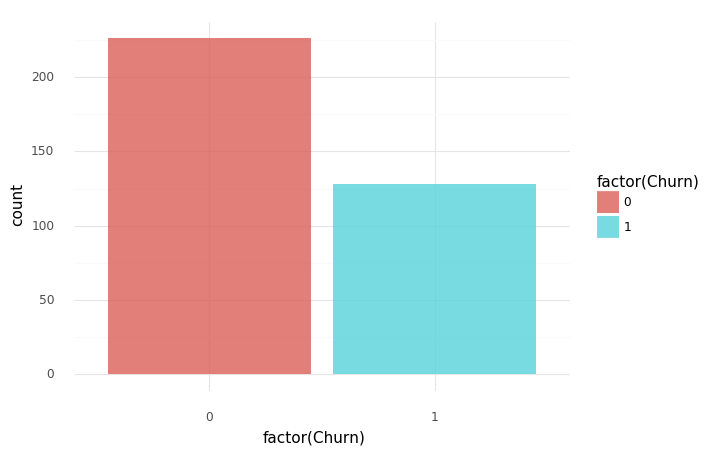

<ggplot: (7545214675)>


In [64]:
p = ggplot(customer_churn, aes('factor(Churn)', fill = 'factor(Churn)')) + geom_bar(alpha = 0.8) + theme_minimal()
print(p)

5-2) 성별 별로 이탈율를 조회하시오.

In [65]:
ex = customer_churn.groupby('Gender').Churn.mean().reset_index()
ex.columns = ['Gender', 'prop']
ex

,Gender,prop
0,F,0.358209
1,M,0.421053


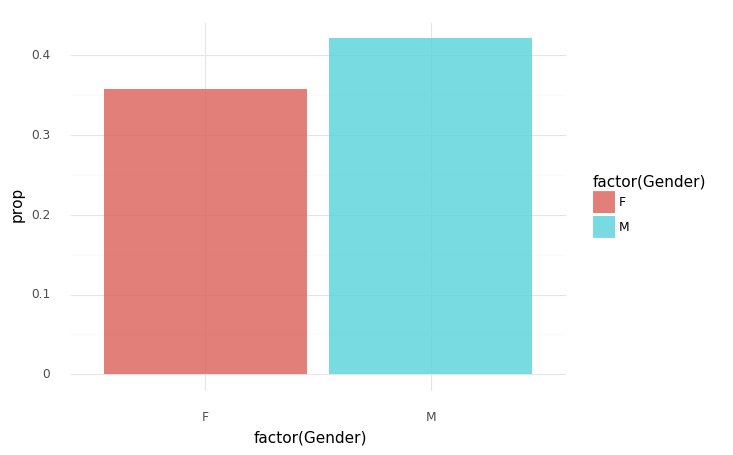

<ggplot: (-9223372029309561256)>


In [66]:
p = ggplot(ex, aes('factor(Gender)', 'prop',  fill = 'factor(Gender)')) + geom_col(alpha = 0.8) + theme_minimal()
print(p)

5-3) 나이의 분포를 히스토그램으로 그려봅시다.

/Users/jeong/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 19'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


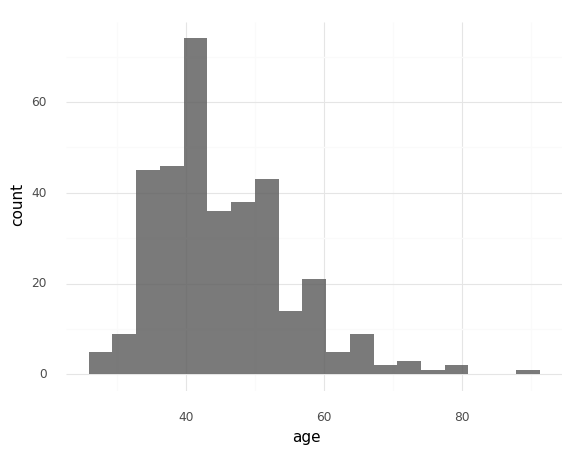

<ggplot: (-9223372029305889192)>


In [67]:
p = ggplot(customer_churn, aes('age')) + geom_histogram(alpha = 0.8) + theme_minimal()
print(p)

In [68]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

5-4) 나이와 이탈여부와의 관계를 차트로 그리려면 코드는 다음과 같습니다.
다음 코드를 수행해 봅시다.

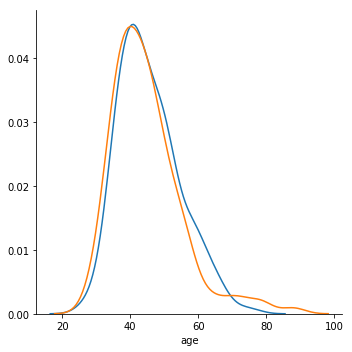

In [69]:
sns.FacetGrid(customer_churn, hue='Churn', size = 5)\
    .map(sns.distplot, 'age', kde=True, hist=False)
plt.show()

다음의 조건에 대해서 차트를 그리시오,
* 최근3개월 구매액과 이탈여부
* 최근3개월 방문횟수와 이탈여부
* 가입개월수와 이탈여부

In [70]:
customer_churn.head()

,CustomerID,Churn,Gender,age,lag_3month_amount,lag_3month_visit_cnt,category1,category2,category3,category4,category5,days_to_register,3month_amt_divide_reg,lag_3month_visit_cnt_divide_reg,pro_nuniqe_cnt
0,c348709,0,F,41,49458.000000,6.000000,7228.0,8370.0,18300.0,0.0,15560.0,597.0,82.705686,0.010033,12.0
1,c354434,0,F,58,19074.765799,3.446097,0.0,0.0,0.0,0.0,0.0,533.0,35.720535,0.006453,0.0
2,c383761,0,F,41,22644.000000,3.000000,6817.0,8400.0,3227.0,0.0,4200.0,172.0,130.890173,0.017341,7.0
3,c352409,0,F,35,2000.000000,1.000000,0.0,0.0,0.0,0.0,2000.0,557.0,3.584229,0.001792,1.0
4,c385259,0,F,26,55127.000000,12.000000,2000.0,0.0,19277.0,9200.0,24650.0,152.0,360.307190,0.078431,12.0


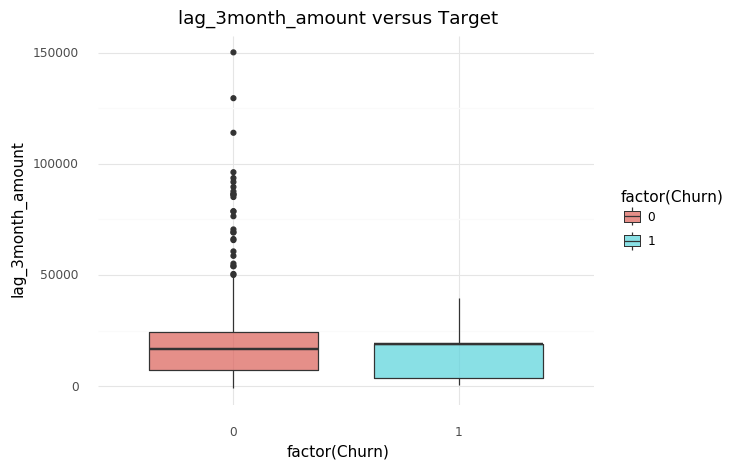

<ggplot: (7548607173)>


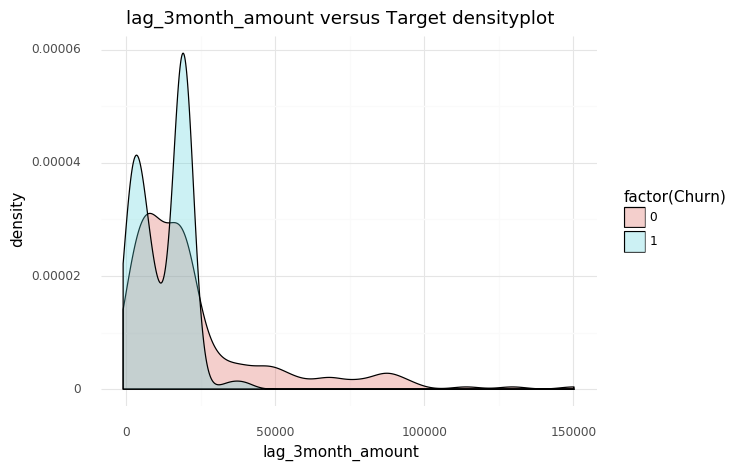

<ggplot: (7548614909)>


In [71]:
# 최근3개월 구매액과 이탈여부
p = (ggplot(customer_churn, aes('factor(Churn)', 'lag_3month_amount', fill = 'factor(Churn)' )) + 
    geom_boxplot(alpha = 0.7) + theme_minimal() + ggtitle('lag_3month_amount versus Target') )
print(p)
p = (ggplot(customer_churn, aes('lag_3month_amount', fill = 'factor(Churn)' )) + 
    geom_density(alpha = 0.3) + theme_minimal() + ggtitle('lag_3month_amount versus Target densityplot') )
print(p)

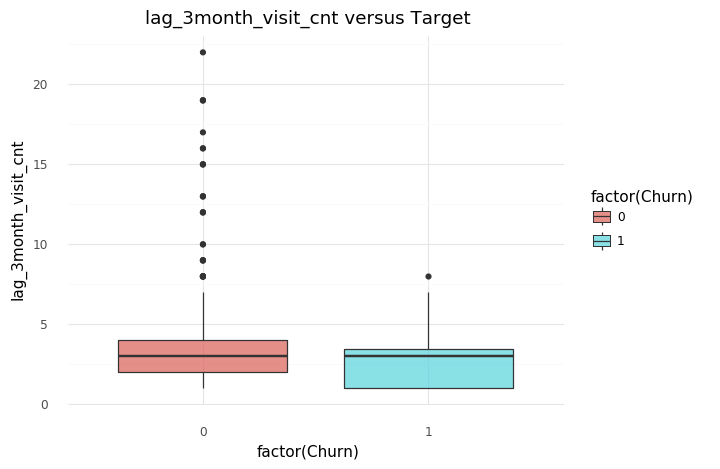

<ggplot: (7548628207)>


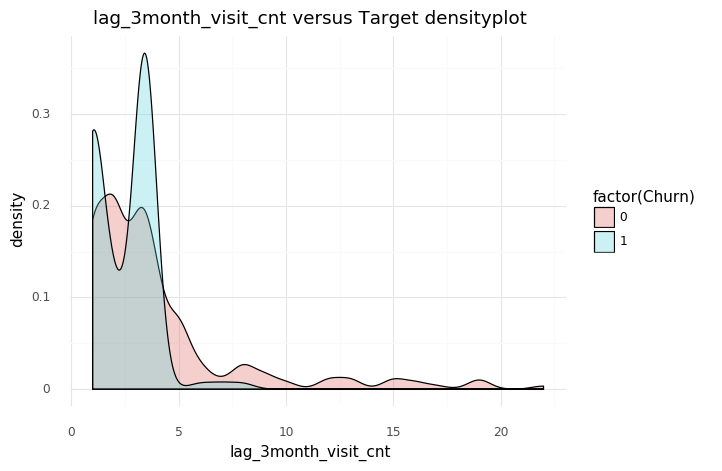

<ggplot: (-9223372029306182561)>


In [72]:
# 최근3개월 방문횟수와 이탈여부
p = (ggplot(customer_churn, aes('factor(Churn)', 'lag_3month_visit_cnt', fill = 'factor(Churn)' )) + 
    geom_boxplot(alpha = 0.7) + theme_minimal() + ggtitle('lag_3month_visit_cnt versus Target') )
print(p)
p = (ggplot(customer_churn, aes('lag_3month_visit_cnt', fill = 'factor(Churn)' )) + 
    geom_density(alpha = 0.3) + theme_minimal() + ggtitle('lag_3month_visit_cnt versus Target densityplot') )
print(p)

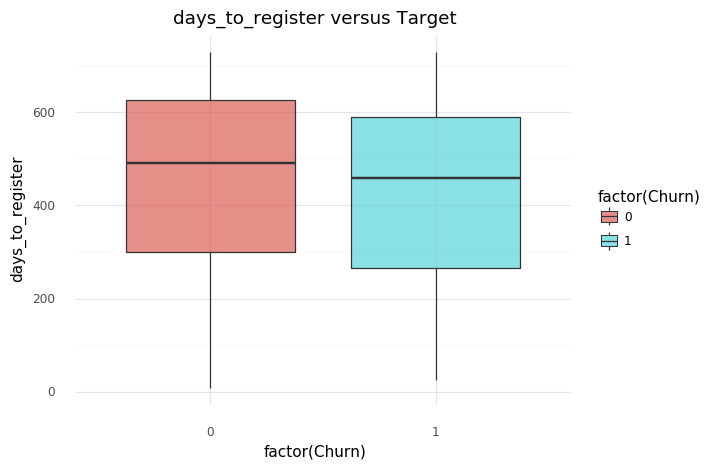

<ggplot: (-9223372029311076983)>


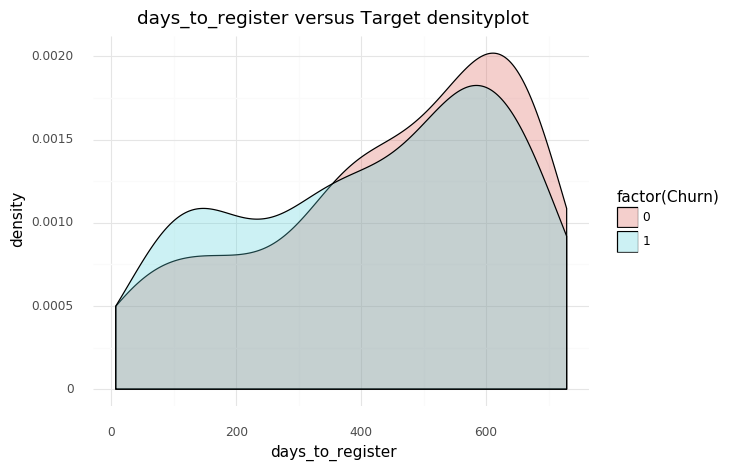

<ggplot: (-9223372029305020444)>


In [73]:
# 가입개월수와 이탈여부
p = (ggplot(customer_churn, aes('factor(Churn)', 'days_to_register', fill = 'factor(Churn)' )) + 
    geom_boxplot(alpha = 0.7) + theme_minimal() + ggtitle('days_to_register versus Target') )
print(p)
p = (ggplot(customer_churn, aes('days_to_register', fill = 'factor(Churn)' )) + 
    geom_density(alpha = 0.3) + theme_minimal() + ggtitle('days_to_register versus Target densityplot') )
print(p)

## 4.모델링

모델링을 위한 전처리
    * Dummry Variable
    * Scaling
   

### 문제 6. Dummy variable만들기


범주형 변수들을 가변수화 합니다.(가변수화 이후 기존 변수는 제거합니다.)

In [74]:
# Gender의 경우 가변수화 하여야 하지만, unique값이 2개밖에 없으므로 0, 1로 대체하였습니다.

# dummy variable 만드는 식
#temp = pd.get_dummies(customer_churn['Gender'])
#pd.concat([customer_churn, temp], axis = 1, inplace = True)
#customer_churn.drop('Temp', axis = 1, inplace = True)

customer_churn['Gender'] = np.where(customer_churn['Gender']=='F', 1 ,0)


불필요한 변수를 제거합니다.

In [75]:
customer_churn.drop('CustomerID', axis = 1, inplace = True)

In [76]:
customer_churn.drop(['category1', 'category2', 'category3', 'category4', 'category5'], axis = 1, inplace = True)

#### na값 체킹

In [77]:
customer_churn.isnull().sum()

Churn                              0
Gender                             0
age                                0
lag_3month_amount                  0
lag_3month_visit_cnt               0
days_to_register                   0
3month_amt_divide_reg              0
lag_3month_visit_cnt_divide_reg    0
pro_nuniqe_cnt                     0
dtype: int64

### Data Split

In [78]:
# sklearn에서 제공하는 split 함수를 이용해보자. : train_test_split
from sklearn.model_selection import train_test_split

# features와 target 분리
X = customer_churn.drop('Churn', axis=1)
y = customer_churn.loc[:, 'Churn'] 

train_features, test_features, train_target, test_target \
    = train_test_split(X, y, test_size=0.2, random_state=1)

### 문제 7. Scalinng

숫자형 변수들을 스케일링 합니다.

In [79]:
# 필요한 함수 로딩
from sklearn.preprocessing import MinMaxScaler

# 선언하기
minmax = MinMaxScaler()

# train 데이터로 .fit ==> 모든변수의 min, max, 공식 도출.
# 말하자면, scaling 하는 모델을 만드는 것!
minmax.fit(train_features) # train min, max

# 위 scaling 공식으로 적용하기(변환하기)
train_features_sc = minmax.transform(train_features)
test_features_sc = minmax.transform(test_features)

In [80]:
train_target, test_target = train_target.values, test_target.values

### 모델링
다음 코드는 그대로 실행하여 결과를 확인해 봅시다.

In [81]:
# 필요한 라이브러리 가져오자
from sklearn.neighbors import KNeighborsClassifier

# confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 모델 준비
knn_cl = KNeighborsClassifier(n_neighbors=3)
knn_cl.fit(train_features, train_target)
test_pred = knn_cl.predict(test_features)

test_acc = accuracy_score(test_target, test_pred)
print('test 정확도 : {:.2f}%'.format(test_acc*100))


test 정확도 : 69.01%


정 분류율(Accuracy)은 몇 % 인가요?  

In [82]:
print(confusion_matrix(test_target, test_pred))

[[35 11]
 [11 14]]


### model score

#### ver 1. (과제 수행을 한 뒤 얻은 feature들만으로 돌린 baseline)
test 정확도 : 60.56%  
[[30 16]  
 [12 13]]  


#### ver 2. 변수 추가(feature1, feature2 추가)
test 정확도 : 67.61%    
[[33 13]  
 [10 15]]   
 
#### ver 3. 변수 추가(feature3추가)
test 정확도 : 71.83%    
[[34 12]  
 [ 8 17]]   
 

#### ver 4. 변수 추가(feature4, 5추가) -> 최종 feature에서 제외  
test 정확도 : 61.97%     
[[29 17]  
 [10 15]]   
 
 
#### ver 4. 변수 제거(ver 3에서 category1~5 컬럼 제거)  
test 정확도 : 74.65%    
[[34 12]  
 [ 6 19]]  

### 문제 8. 성능을 더 높이기 위해서 무엇을 하면 좋을까요?

여러분의 의견을 아래 적어 봅시다.

- 1. 데이터 사이즈를 늘립니다. 특히 이탈을 한 데이터가 적으므로 해당 데이터들의 샘플을 더욱 확보합니다.
- 2. 의미없는 데이터, 노이즈들을 제거합니다. 
- 3. Target 비율을 조정합니다. 1번과 비슷한 맥락이며, 많은 데이터의 라벨값을 샘플링할때 모델이 학습하기 더욱 용이할것입니다.
- 4. 좋은 feature들을 많이 생성합니다. 고객의 과거 데이터들을 aggregation한 결과들이므로, 과거 패턴들을 피쳐화 할수있는 변수들을 더욱 발굴합니다.
- 5. 다양한 모델에 학습시켜보고, validation을 정확하게 잡습니다. 이를통해 과적합을 예방합니다. 